In [43]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import csv, sqlite3
from sqlalchemy import create_engine
import plotly.express as px


In [44]:
df = pd.read_csv('Data/OWID_Covid_data.csv')

In [79]:
smaller_df = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 'new_tests', 'total_tests', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy']]

## Describing df without scientific notation

In [46]:
smaller_df['total_tests']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
157007    1816276.0
157008          NaN
157009          NaN
157010          NaN
157011          NaN
Name: total_tests, Length: 157012, dtype: float64

In [108]:
smaller_df['extreme_poverty'].describe()

count    79181.000000
mean        13.566899
std         20.246718
min          0.100000
25%          0.500000
50%          2.200000
75%         21.200000
max         77.600000
Name: extreme_poverty, dtype: float64

In [118]:
smaller_df['stringency_index'].sum()

3792142.61

In [112]:
smaller_df['total_deaths'] = np.nan_to_num(smaller_df['total_deaths'])
smaller_df['total_cases'] = np.nan_to_num(smaller_df['total_cases'])
smaller_df['reproduction_rate'] = np.nan_to_num(smaller_df['reproduction_rate'])
smaller_df['population'] = np.nan_to_num(smaller_df['population'])
smaller_df['gdp_per_capita'] = np.nan_to_num(smaller_df['gdp_per_capita'])
smaller_df['extreme_poverty'] = np.nan_to_num(smaller_df['extreme_poverty'])
smaller_df['life_expectancy'] = np.nan_to_num(smaller_df['life_expectancy'])
smaller_df['hospital_beds_per_thousand'] = np.nan_to_num(smaller_df['hospital_beds_per_thousand'])
smaller_df['stringency_index'] = np.nan_to_num(smaller_df['stringency_index'])


smaller_df = smaller_df[smaller_df['total_tests'] != 0]
smaller_df = smaller_df[smaller_df['new_cases'] >= 0]
smaller_df = smaller_df[smaller_df['new_deaths'] >= 0]
smaller_df = smaller_df[smaller_df['population'] >= 50]
smaller_df = smaller_df[smaller_df['gdp_per_capita'] >= 600]
smaller_df = smaller_df[smaller_df['extreme_poverty'] > 0]
smaller_df = smaller_df[smaller_df['hospital_beds_per_thousand'] > 0]




In [109]:
smaller_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [114]:
smaller_df.isna().sum()

iso_code                          0
continent                       734
location                          0
date                              0
total_cases                       0
new_cases                         0
total_deaths                      0
new_deaths                        0
reproduction_rate                 0
new_tests                     27973
total_tests                   26942
positive_rate                 21807
tests_per_case                22038
tests_units                   19727
total_vaccinations            48318
people_vaccinated             49306
stringency_index               4676
population                        0
population_density                0
median_age                        0
aged_70_older                     0
gdp_per_capita                    0
extreme_poverty                   0
cardiovasc_death_rate             0
diabetes_prevalence               0
female_smokers                 8958
male_smokers                  10310
handwashing_facilities      

In [50]:
smaller_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,136623.00000,136630.00000,136630.00000,136630.00000,116002.00000,21091.00000,22256.00000,61995.00000,62628.00000,72517.00000,...,117801.00000,117538.00000,79854.00000,117309.00000,122183.00000,92435.00000,91083.00000,59028.00000,106419.00000,127273.00000
mean,2520357.13258,10952.24861,54235.34866,170.24932,1.01777,910.25997,4070.06142,66440.61679,16088091.02403,0.09017,...,5.64528,19776.07096,13.45762,255.66555,7.88254,10.57059,32.36888,50.35656,3.03426,73.46459
std,14087060.95458,72626.99704,284870.60546,828.84451,0.35500,2721.24185,11553.22882,214200.23926,59859479.88715,0.09933,...,4.26072,20022.46426,20.19604,118.34568,3.95464,10.50742,13.28525,32.10931,2.48300,7.65434
min,1.00000,0.00000,0.00000,0.00000,-0.03000,0.00000,0.00000,1.00000,15.00000,0.00000,...,0.52600,661.24000,0.10000,79.37000,0.99000,0.10000,7.70000,1.18800,0.10000,53.28000
25%,4804.50000,6.00000,70.00000,0.00000,0.83000,27.00000,120.00000,2721.50000,413264.75000,0.01750,...,2.03400,4466.50700,0.50000,164.90500,5.31000,1.90000,21.40000,19.27500,1.30000,67.94000
50%,40687.00000,137.00000,703.00000,2.00000,1.01000,144.00000,613.50000,9621.00000,1871821.50000,0.05390,...,4.20900,13367.56500,2.20000,240.20800,7.11000,6.20000,31.20000,49.54200,2.40000,75.05000
75%,345450.50000,1275.00000,6672.75000,19.00000,1.19000,590.50000,2596.50000,37832.50000,8157132.50000,0.12980,...,9.20700,28763.07100,21.20000,325.72100,10.08000,19.30000,41.10000,83.24100,4.00000,78.92000
max,354959680.00000,4232499.00000,5604957.00000,18061.00000,6.05000,28891.00000,154383.00000,3740296.00000,762950814.00000,0.97040,...,18.49300,116935.60000,77.60000,724.41700,23.36000,44.00000,78.10000,98.99900,13.80000,86.75000


In [51]:
df_by_country = smaller_df.groupby('iso_code')['total_cases', 'total_deaths']

df_by_country.head()

<ipython-input-51-e5189f74fcd0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_country = smaller_df.groupby('iso_code')['total_cases', 'total_deaths']


,total_cases,total_deaths
28,40.0,1.0
29,42.0,1.0
30,74.0,1.0
31,80.0,2.0
32,91.0,2.0
...,...,...
156339,3.0,1.0
156340,3.0,1.0
156341,3.0,1.0
156342,3.0,1.0


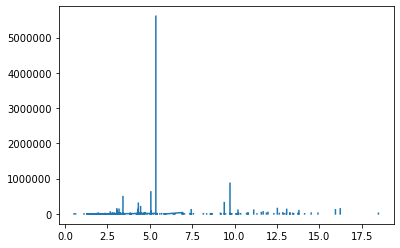

In [52]:
fig, ax = plt.subplots()
ax.plot(df['aged_70_older'], df['total_deaths'] )
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [53]:
# fig, ax = plt.subplots()
# ax.hist(smaller_df['gdp_per_capita'])
# plt.show()
# ax.hist(smaller_df['aged_70_older'])
# plt.show()
# ax.hist(smaller_df['gdp_per_capita'])
# plt.show()

In [54]:
# fig, ax = plt.subplots()
# ax.plot(df['new_cases'], df['new_deaths'], 'bo')
# ax.ticklabel_format(useOffset=False, style='plain')
# plt.show()

# fig, ax = plt.subplots()
# ax.plot(df['total_cases'], df['total_deaths'], 'bo')
# ax.ticklabel_format(useOffset=False, style='plain')
# plt.show()

# fig, ax = plt.subplots()
# ax.plot(df['aged_70_older'], df['total_deaths'], 'bo')
# ax.ticklabel_format(useOffset=False, style='plain')
# plt.show()

In [55]:
# %matplotlib qt
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import axes3d

# x = smaller_df['total_deaths']
# y = smaller_df['new_deaths']
# z = smaller_df['gdp_per_capita']


# def threeD_rotation():
#     fig = plt.figure(figsize = (15, 10))
#     ax = fig.add_subplot(projection ="3d")
#     ax.scatter3D(z, y, x, color = "green")
#     ax.set_xlabel('Total Deaths')
#     ax.set_ylabel('New Deaths')
#     ax.set_zlabel('GDP Per Captia')
#     for angle in range(0, 360):
#         ax.view_init(30, angle)
#         plt.draw()
#         plt.pause(.00001)
#         plt.show()

# threeD_rotation()

In [56]:
# con = sqlite3.connect(':memory:')
# cur = con.cursor()
# cur.execute('CREATE TABLE t (iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million,new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients,hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million);')

# with open('Data/OWID_Covid_data.csv', 'r') as fin:
#     dr = csv.DictReader(fin)
#     to_db = [(i['iso_code'], i['continent'], i['location'], i['date'], i['total_cases'], i['new_cases'], i['new_cases_smoothed'], i['total_deaths'], i['new_deaths'], i['new_deaths_smoothed'], i['total_cases_per_million'], i['new_cases_per_million'], i['new_cases_smoothed_per_million'], i['total_deaths_per_million'], i['new_deaths_per_million'], i['new_deaths_smoothed_per_million'], i['reproduction_rate'], i['icu_patients'], i['icu_patients_per_million'], i['hosp_patients'], i['hosp_patients_per_million'], i['weekly_icu_admissions'], i['weekly_icu_admissions_per_million'], i['weekly_hosp_admissions'], i['weekly_hosp_admissions_per_million'], i['new_tests'], i['total_tests'], i['total_tests_per_thousand'], i['new_tests_per_thousand'], i['new_tests_smoothed'], i['new_tests_smoothed_per_thousand'], i['positive_rate'], i['tests_per_case'], i['tests_units'], i['total_vaccinations'], i['people_vaccinated'], i['people_fully_vaccinated'], i['total_boosters'], i['new_vaccinations'], i['new_vaccinations_smoothed'], i['total_vaccinations_per_hundred'], i['people_vaccinated_per_hundred'], i['people_fully_vaccinated_per_hundred'], i['total_boosters_per_hundred'], i['new_vaccinations_smoothed_per_million'], i['new_people_vaccinated_smoothed'], i['new_people_vaccinated_smoothed_per_hundred'], i['stringency_index'], i['population'], i['population_density'], i['median_age'], i['aged_65_older'], i['aged_70_older'], i['gdp_per_capita'], i['extreme_poverty'], i['cardiovasc_death_rate'], i['diabetes_prevalence'], i['female_smokers'], i['male_smokers'], i['handwashing_facilities'], i['hospital_beds_per_thousand'], i['life_expectancy'], i['human_development_index'], i['excess_mortality_cumulative_absolute'], i['excess_mortality_cumulative'], i['excess_mortality'], i['excess_mortality_cumulative_per_million'] ) for i in dr]

# cur.executemany('INSERT INTO t (iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million,new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients,hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);', to_db)

# con.commit()
